Deductive reasoning is a conclusion given from a set of facts. Ex. "All fruits are good for health", "Apple is a fruit" = "Apples are good for health"

Inductive reasoning draws an abstract conclusion from facts. "There are fireflies this summer" = "There will be fireflies next summer"

In [306]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import ensemble
from xgboost import XGBClassifier

adult_df = pd.read_csv("adult.data")
adult_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [307]:
adult_df.columns = [
    "age", "worktype", "id", "max_education", "number", 
    "married", 'occupation', 'relationship', 'race', 
    'gender', 'capital_up', 'capital_down', 'hpw', 
    'country', 'income'
]

adult_df.head()

,age,worktype,id,max_education,number,married,occupation,relationship,race,gender,capital_up,capital_down,hpw,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [308]:
adult_df.dropna(inplace=True)

adult_df = pd.get_dummies(adult_df, columns=["worktype", "max_education", "married", "occupation", "relationship", "race", "gender", "country"])


adult_df['income'] = adult_df['income'].apply(lambda x: 1 if x == ' >50K'
                                              else 0)

adult_df.head()

,age,id,number,capital_up,capital_down,hpw,income,worktype_ ?,worktype_ Federal-gov,worktype_ Local-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37,284582,14,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [309]:
X = adult_df.drop('income', axis=1)
y = adult_df['income']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42) 

In [310]:
model = tree.DecisionTreeClassifier(max_depth=7, random_state=42)

model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [311]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4912
           1       0.79      0.56      0.66      1600

    accuracy                           0.86      6512
   macro avg       0.83      0.76      0.78      6512
weighted avg       0.85      0.86      0.85      6512



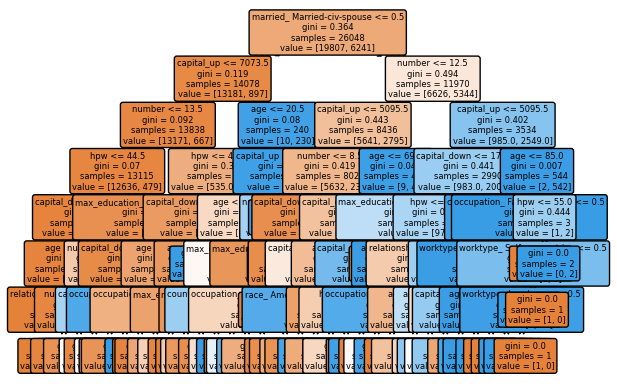

In [312]:
tree.plot_tree(model, feature_names=list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()

For this decision tree, I mainly tuned the max_depth until I got a high enough accuracy and precision

In [313]:
forest_model = ensemble.RandomForestClassifier(random_state=42,n_estimators=80,class_weight='balanced')

In [314]:
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

In [315]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4912
           1       0.75      0.62      0.68      1600

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.79      6512
weighted avg       0.85      0.86      0.85      6512



For the Random Forest, I tried tuning the n_estimators to 100 first, but later noticed that 80 gave me the highest numbers for precision, recall and even accuracy. I also set class_weight to 'balanced' to focus on the minority class.

In [316]:
xgb_model = XGBClassifier(use_label_encoder= False ,eval_metric='logloss',n_estimators=50,random_state=42,max_depth=2)
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test) 

print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4912
           1       0.79      0.61      0.69      1600

    accuracy                           0.87      6512
   macro avg       0.84      0.78      0.80      6512
weighted avg       0.86      0.87      0.86      6512



For XGBoost, I used logloss for more accuracy as well as limiting the amount of n_estimators and max_depth, as the process was taking too long.